Prédiction d'éligibilité au prêt

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [174]:

data = pd.read_csv("D:/ilyas/Documents/Projets DS/Eligibility Prediction for loan/Loan_Data.csv")
data.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [176]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [177]:
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [178]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [179]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

On transforme les valeurs NULL des variables catégoriques en la valeur la plus fréquemment présente dans la colonne

In [180]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [181]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

On remplace les valeurs NULL des variables numériques par la médiane

In [182]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [183]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

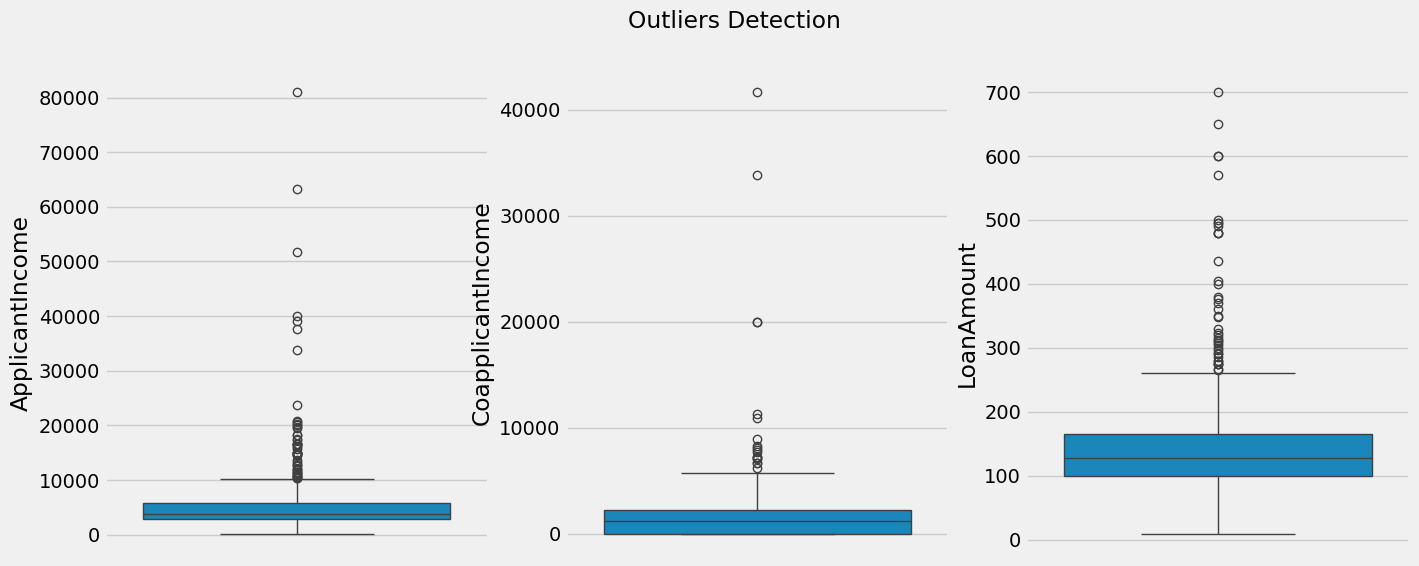

In [184]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle("Outliers Detection")
plt.show()

In [185]:
print("Avec les valeurs extrêmes", data.shape)

data = data[data['ApplicantIncome']<25000]

print("Sans les valeurs extrêmes", data.shape)

Avec les valeurs extrêmes (614, 13)
Sans les valeurs extrêmes (607, 13)


In [186]:
print("Avec les valeurs extrêmes", data.shape)

data = data[data['CoapplicantIncome']<12000]

print("Sans les valeurs extrêmes", data.shape)

Avec les valeurs extrêmes (607, 13)
Sans les valeurs extrêmes (603, 13)


In [187]:
print("Avec les valeurs extrêmes", data.shape)

data = data[data['LoanAmount']<400]

print("Sans les valeurs extrêmes", data.shape)

Avec les valeurs extrêmes (603, 13)
Sans les valeurs extrêmes (591, 13)


<Axes: xlabel='LoanAmount', ylabel='Density'>

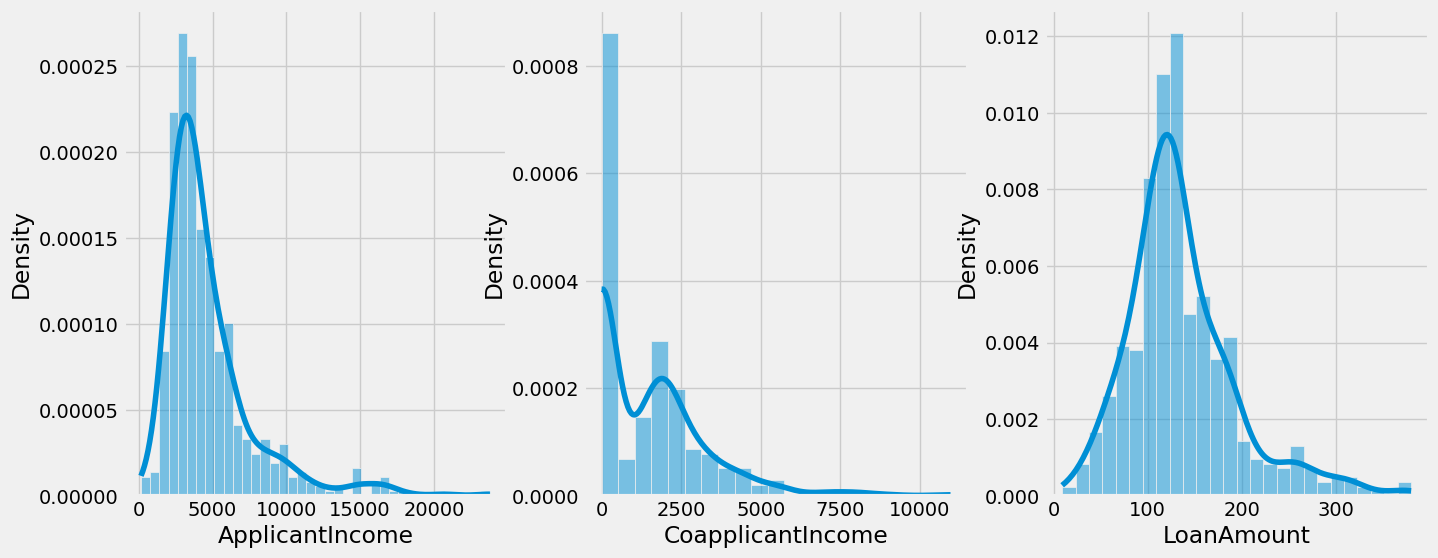

In [188]:

plt.subplot(1, 3, 1)
sns.histplot(data["ApplicantIncome"], kde=True, stat="density")

plt.subplot(1, 3, 2)
sns.histplot(data["CoapplicantIncome"], kde=True, stat="density")

plt.subplot(1, 3, 3)
sns.histplot(data["LoanAmount"], kde=True, stat="density")


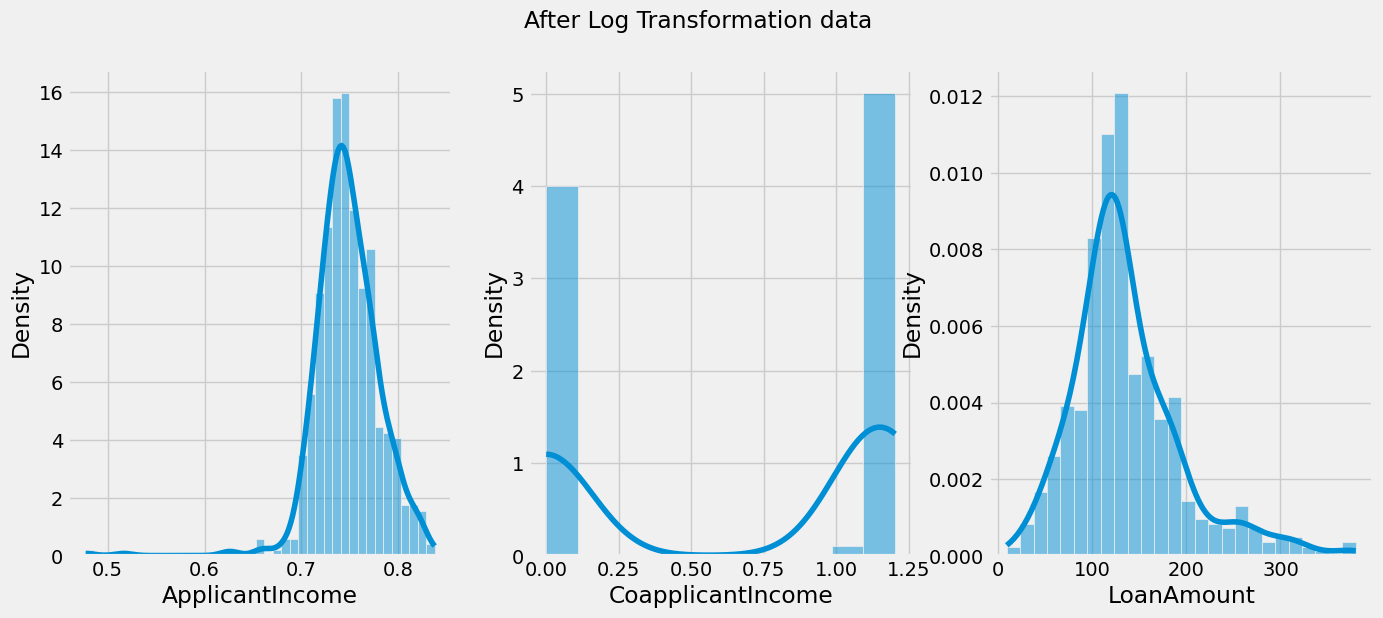

In [228]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])
#log1p(x) = log_e(1 + x)
#utile pour manipuler les valeurs proches de 0, sans perte de précision

plt.subplot(1, 3, 1)
sns.histplot(data["ApplicantIncome"], kde=True, stat="density")

plt.subplot(1, 3, 2)
sns.histplot(data["CoapplicantIncome"], kde=True, stat="density")

plt.subplot(1, 3, 3)
sns.histplot(data["LoanAmount"], kde=True, stat="density")

plt.suptitle("After Log Transformation data")
plt.show()

In [190]:
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

In [191]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [192]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

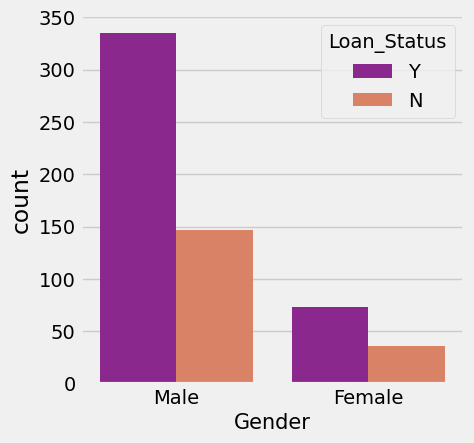

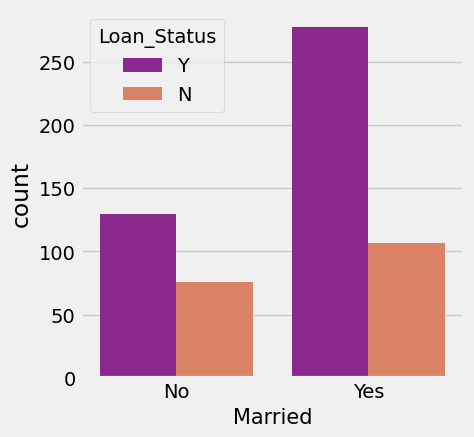

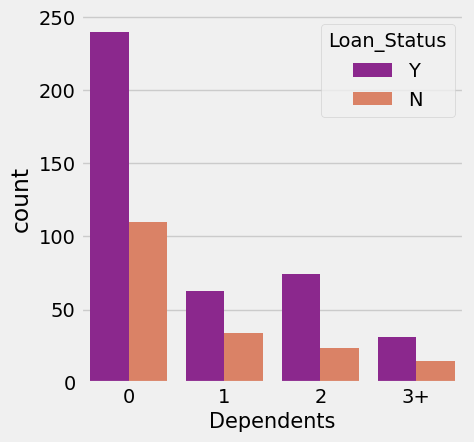

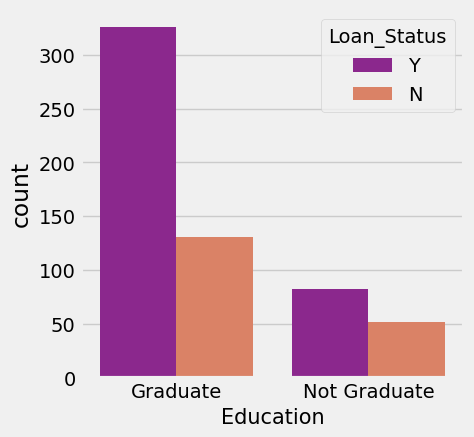

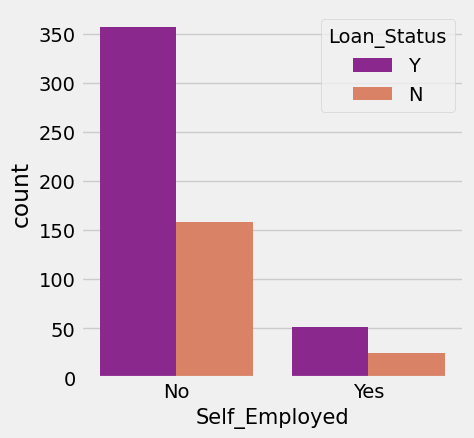

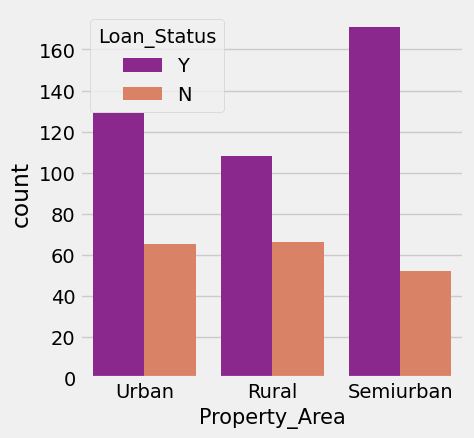

In [193]:
for i in cat[1:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot(x =i, hue = 'Loan_Status', data = data, palette = 'plasma' )
    plt.xlabel(i, fontsize = 15)

In [194]:
print(pd.crosstab(data['Loan_Status'], data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [195]:
print(pd.crosstab(data['Loan_Status'], data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [196]:
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [197]:
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


In [198]:
data = data.drop(['Loan_ID'], axis = 1)

In [199]:
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


On transforme les variables catégoriques explicatives ainsi que la target en variables binaires

In [200]:
data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes', 'No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban','Rural'),(1,1,0))
data['Dependents'] = data['Dependents'].replace(('0', '1','2', '3+'),(0,1,1,1))

data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'),(1,0))

In [201]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [202]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

La valeur '0' de la variable "loan_status" est sous-représentée dans les données, on fait donc un "oversampling" afin de gérer le déséquilibre

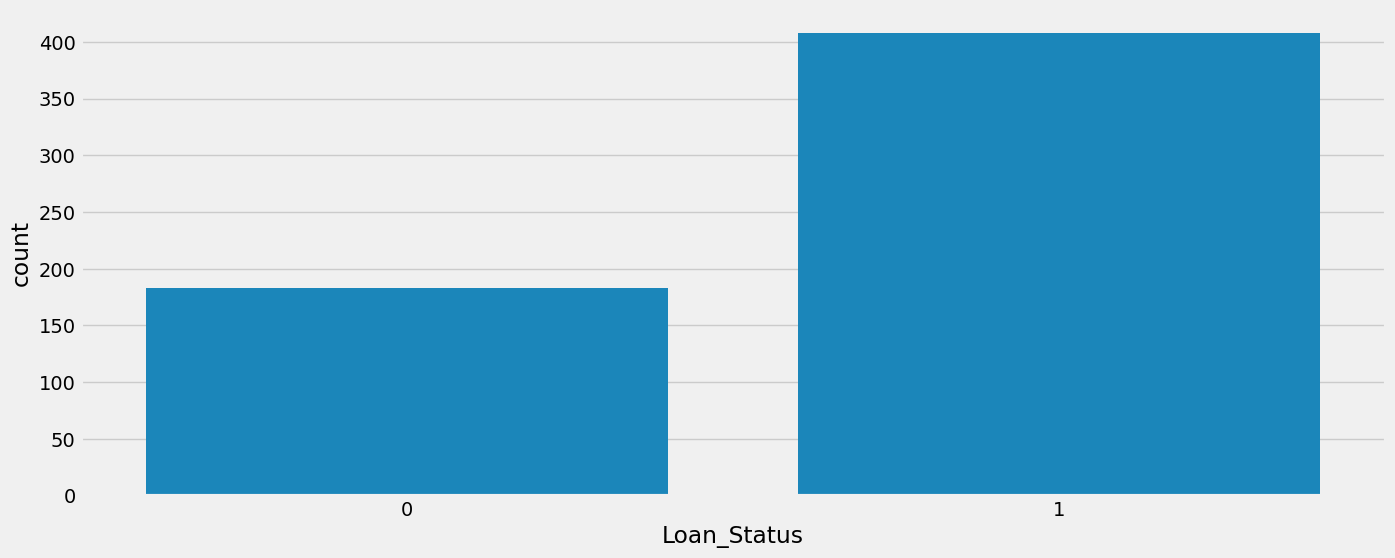

In [203]:
ax = sns.countplot(x=y)

In [204]:
from imblearn.over_sampling import SMOTE

In [205]:
x_rasmple, y_rasmple = SMOTE().fit_resample(x, y.values.ravel())

In [206]:
print(x_rasmple.shape)
print(y_rasmple.shape)

(816, 11)
(816,)


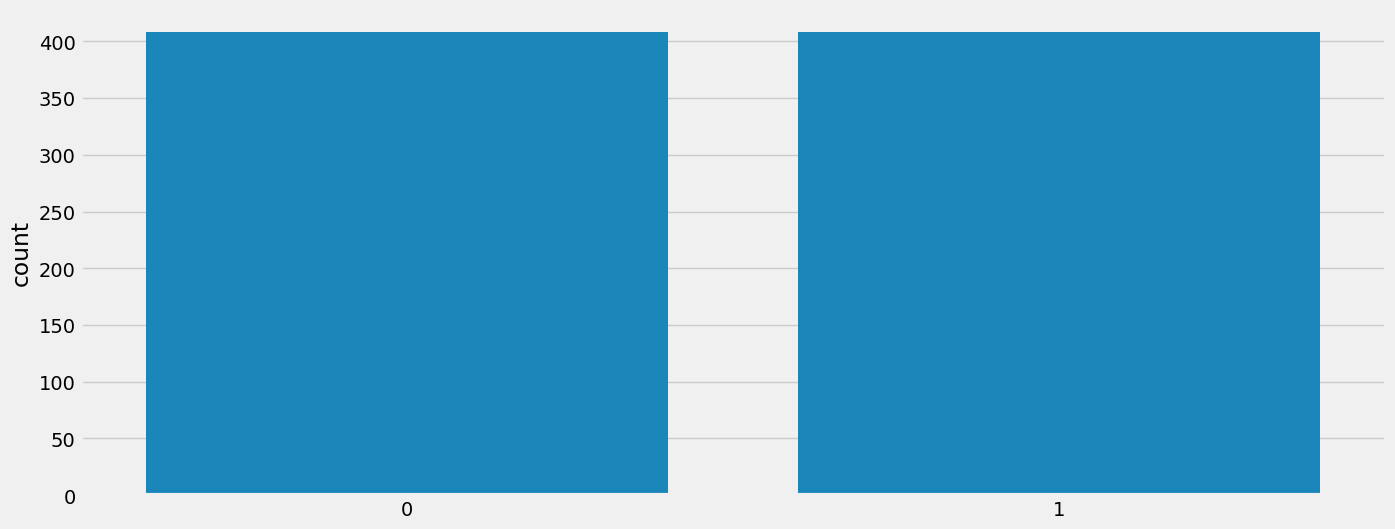

In [207]:
ax = sns.countplot(x=y_rasmple)

On sépare ensuite nos données équilibrées en un jeu de données test, et un jeu de données d'entraînement

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
x_train, x_test, y_train,y_test = train_test_split(x_rasmple, y_rasmple, test_size = 0.2, random_state = 0)

In [210]:
x_train.shape

(652, 11)

In [211]:
y_test.shape

(164,)

Implémentation du modèle

1. Régression Logistique

In [212]:

from sklearn.linear_model import LogisticRegression

In [213]:
from sklearn.metrics import accuracy_score

In [214]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

C:\Users\ilyas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [215]:
y_pred = LR.predict(x_test)

In [216]:
print("Traning Accuracy", LR.score(x_train, y_train))
print("Test Accuracy", LR.score(x_test, y_test))

Traning Accuracy 0.8052147239263804
Test Accuracy 0.823170731707317


In [217]:
from sklearn.metrics import classification_report

In [218]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        82
           1       0.78      0.90      0.84        82

    accuracy                           0.82       164
   macro avg       0.83      0.82      0.82       164
weighted avg       0.83      0.82      0.82       164



In [219]:
print(f"La précision de notre modèle est de :{accuracy_score(y_pred, y_test)* 100}%")

La précision de notre modèle est de :82.3170731707317%


In [220]:
model_pred = np.array([[1,1,1, 1, 1,3924, 1733, 148.0, 360, 1, 1 ]])

In [221]:

prediction = LR.predict(model_pred)
print(prediction[0])

0


C:\Users\ilyas\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


2. Forêt Aléatoire

In [222]:
modele_rf = RandomForestClassifier(
     n_estimators=100, #nbr d'arbres
     criterion='gini', #critère de séparation des branches
     max_depth=None, #profondeur max des arbres
     min_samples_split=2, #nbr min d'échantillons pour séparer
     min_samples_leaf=1, #nbr min d'échantillons pour faire une feuille
     min_weight_fraction_leaf=0.0, #fraction min pour
     max_features='auto', #nbr de colonnes séléctionnées pour chaque arbre
     max_leaf_nodes=None, #nbr max de noeuds 
     min_impurity_decrease=0.0, #baisse min du critère d'impureté pour séparer
     bootstrap=True,
     oob_score=False,
     n_jobs=None, #nbr de traitements à effectuer en parallèle
     random_state=None, #graine aléatoire
     verbose=0,
     warm_start=False,
     class_weight=None, #poids associés à chaque classe
     ccp_alpha=0.0, 
     max_samples=None,)

In [223]:
modele_rf.fit(x_train, y_train)

C:\Users\ilyas\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto')

In [224]:
pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
Credit_History,0.355744
LoanAmount,0.181220
ApplicantIncome,0.164531
CoapplicantIncome,0.109478
Education,0.039240
Loan_Amount_Term,0.038009
Property_Area,0.031022
Married,0.028149
Dependents,0.021905
Gender,0.016463


On remarque que les variables qui expliquent le mieux les décisions de notre modèle sont l'historique de crédit, le montant emprunté, le salaire du demandeur et du codemandeur de prêt.

In [225]:
print(classification_report(y_test, modele_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        82
           1       0.79      0.83      0.81        82

    accuracy                           0.80       164
   macro avg       0.81      0.80      0.80       164
weighted avg       0.81      0.80      0.80       164



In [226]:
print(f"Le pourcentage de bien classés est de : {accuracy_score(y_test, modele_rf.predict(x_test))*100} %")

Le pourcentage de bien classés est de : 80.48780487804879 %


CONCLUSION

Nos deux modèles produisent des résultats plutôt satisfaisants, avec la forêt aléatoire qui est plus précise, notamment pour déterminer les clients qui sont éligibles à un prêt.